<a href="https://colab.research.google.com/github/annesantos1990/mba-practice/blob/main/Text_Mining_Pr%C3%A1tica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Mining: Pré-processamento de Avaliações da Netflix na Play Store"



Neste notebook, praticarei técnicas de text mining como parte do processo de pré-processamento de dados textuais, etapa importante da da Análise de Sentimentos (NLP - Processamento de Linguagem Natural).

## Carregando as principais bibliotecas

In [ ]:
!pip install nltk # Instala a biblioteca NLTK (Natural Language Toolkit), muito usada para tarefas de PLN, como tokenização, stopwords, stemming etc.
!pip install wordcloud # Instala a biblioteca WordCloud, usada para gerar nuvens de palavras a partir de textos — ótimo para visualizações.
!pip install spacy # Instala a biblioteca spaCy, outra poderosa ferramenta de PLN, com modelos prontos para diferentes idiomas, incluindo o português.
!python -m spacy download pt_core_news_sm # Faz o download do modelo de língua portuguesa chamado pt_core_news_sm, necessário para o spaCy fazer análise de textos em português (como lematização, POS tagging etc).
!pip install pandas langdetect
!pip install deep-translator
!pip install googletrans-py
!pip install deepl
!pip install googletrans==4.0.0-rc1
! pip install -U deep-translator



import nltk # Importa a biblioteca NLTK.
nltk.download('stopwords') # Baixa a lista de stopwords (palavras comuns como "de", "a", "e", "o", que normalmente são removidas de análises).
nltk.download('punkt_tab') # é um modelo pré-treinado de tokenização baseado em regras linguísticas.
nltk.download('rslp') # Baixa o RSLP Stemmer, que é um algoritmo para fazer radicalização (reduzir palavras para sua raiz) em português.
from nltk.stem import WordNetLemmatizer # Lematização - ❗️"Atenção: o WordNetLemmatizer é voltado para lematização em inglês. Para textos em português, é melhor o modelo do spaCy (pt_core_news_sm)."
# Baixar recursos necessários para lematização:
nltk.download('wordnet')
nltk.download('omw-1.4')
from collections import Counter # Importa a classe Counter, usada para contar a frequência de itens (como palavras ou tokens).
from nltk.corpus import stopwords # Importa a lista de stopwords do NLTK, que você já baixou.
from nltk.tokenize import ToktokTokenizer # Importa o ToktokTokenizer, um tokenizer simples e rápido do NLTK (divide textos em palavras ou frases).
from nltk.tokenize import word_tokenize # outro método de tokenização. Mais adequado para a língua inglesa.
#from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud # Importa a classe WordCloud, para gerar as nuvens de palavras.
from nltk.stem import RSLPStemmer # Importa o radicalizador RSLP (muito usado em português) para aplicar o stemming. Não foi usado nesse notebook
from nltk.stem import PorterStemmer # stemming para textos em inglês
import spacy
nlp = spacy.load("pt_core_news_sm") # Carrega o modelo de linguagem portuguesa do spaCy, que permite processar textos para extrair entidades, lemas, classes gramaticais etc.
from deep_translator import GoogleTranslator # deep translator - permite uma quantidade ilimitada de traduções
from langdetect import detect # detecção de idiomas
from googletrans import Translator
import deepl
import os
import time
from googletrans import Translator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 93.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=9f404957c869a3d88ebfd746f5b02a3d8bb61a8d54168f7e9a14f9accc31e127
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for googletrans-py: filename=

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Banco de Dados

Para essa prática, utilizei um banco de dados que reúne informações sobre as avaliações feitas por usuários da Netflix na Google Play Store. Além do texto das avaliações, o conjunto de dados inclui o conteúdo, a data e o score das avaliações.

O banco de dados foi obtido através do Kaggle através do link:

https://www.kaggle.com/datasets/ashishkumarak/netflix-reviews-playstore-daily-updated

## Suas colunas:

| Coluna | O que é | Vale a pena manter? |
| --- | --- | --- |
| `reviewId` | ID único da avaliação |
| `userName` | Nome do usuário |
| `content` | Texto da avaliação |
| `score` | Nota dada (1 a 5) |
| `thumbsUpCount` | Quantidade de "curtidas" na avaliação |
| `reviewCreatedVersion` | Versão do app no momento da avaliação |
| `at` | Data da avaliação |
| `appVersion` | Versão do app que o usuário usava |

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MBA - Data Science - USP ESALQ/Text Mining, Sentiment Analysis e NLP I/netflix_reviews.csv')

In [ ]:
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,9eacdc69-033d-44f0-ade2-0e089c5f1a15,Biswajit Murmu,it is a good entertainment app but there are t...,2,0,9.9.1 build 9 62416,2025-04-08 13:45:13,9.9.1 build 9 62416
1,20010353-75d7-4477-b9a1-488b32f8e29c,Daniel Ellis,overriding my screen brightness during ads is ...,1,1,9.9.1 build 9 62416,2025-04-08 13:38:46,9.9.1 build 9 62416
2,dd835d0d-eb49-4507-a338-52d088193691,Sudhir Gaikwad,Awesome!,5,0,NaN,2025-04-08 13:27:33,NaN
3,7cdd907b-53c3-4289-bf29-2c676b985eeb,Hayden Elders,In netflix good movie,5,0,1.0,2025-04-08 13:18:57,1.0
4,ce15986f-8bde-48fe-95d6-a60c87b3cd18,fzrharm,Had Netflix in Thailand so i could watch weste...,1,3,9.9.1 build 9 62416,2025-04-08 13:04:03,9.9.1 build 9 62416
...,...,...,...,...,...,...,...,...
133484,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
133485,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
133486,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
133487,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133489 entries, 0 to 133488
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              133489 non-null  object
 1   userName              133487 non-null  object
 2   content               133484 non-null  object
 3   score                 133489 non-null  int64 
 4   thumbsUpCount         133489 non-null  int64 
 5   reviewCreatedVersion  111358 non-null  object
 6   at                    133489 non-null  object
 7   appVersion            111358 non-null  object
dtypes: int64(2), object(6)
memory usage: 8.1+ MB


In [ ]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

#### Verificando valores nulos

In [ ]:
dados_nulos = df.isnull().mean()*100
dados_nulos

,0
reviewId,0.000000
userName,0.001498
content,0.003746
score,0.000000
thumbsUpCount,0.000000
reviewCreatedVersion,16.578894
at,0.000000
appVersion,16.578894


In [ ]:
df['content'] = df['content'].fillna('')

## Pré-processamento - Text Mining

Nesta etapa, foi feito o pré-processamento dos textos com o objetivo de padronizar os dados e transformar os dados brutos em um formato que facilite a análise, vizualização e aplicação dos modelos de aprendizado de máquina.

A seguir, está a lista dos principais procedimentos adotados nessa fase:

1. Limpeza do texto: Remoção de Pontuação; conversão para letras minúsculas (lowercase), remoção de números, remover caracteres especiais e tradução para a língua inglesa.
2. Tokenização;
3. Remoção de Stopwords;
4. Normalização dos textos;
5. Stemming e Lematização;


### Limpeza do texto

Nessa etapa farei a limpeza, colocando o texto em letras minúsculas, eliminando caracteres especiais, remover pontuação, etc...

#### Lowercase

Convertendo para minúsculas.

Python é uma linguagem de programação que diferencia maiúsculas de minúsculas. Portanto, para evitar problemas e garantir a consistência no processamento do texto, convertemos todo o texto para letras minúsculas.

In [ ]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

<ipython-input-8-614eaff662ae>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [ ]:
df.head(3)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,9eacdc69-033d-44f0-ade2-0e089c5f1a15,biswajit murmu,it is a good entertainment app but there are t...,2,0,9.9.1 build 9 62416,2025-04-08 13:45:13,9.9.1 build 9 62416
1,20010353-75d7-4477-b9a1-488b32f8e29c,daniel ellis,overriding my screen brightness during ads is ...,1,1,9.9.1 build 9 62416,2025-04-08 13:38:46,9.9.1 build 9 62416
2,dd835d0d-eb49-4507-a338-52d088193691,sudhir gaikwad,awesome!,5,0,NaN,2025-04-08 13:27:33,NaN


#### Removendo URLs

Antes de remover, vamos veriricar se exite urls no texto:

In [ ]:
import re

url_regex = r'(http[s]?://\S+|www\.\S+)'

# A linha do código abaixo cria uma nova coluna booleana indicando se a célula tem URL
df['tem_url'] = df['content'].str.contains(url_regex, regex=True, na=False)

<ipython-input-10-aadfe187d61e>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['tem_url'] = df['content'].str.contains(url_regex, regex=True, na=False)


In [ ]:
df[df['tem_url'] == True]

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,tem_url


Como é possível ver acima, não tem urls.

#### Removendo caracteres que não sejam palavras e que não sejam espaços em branco

É essencial remover quaisquer caracteres que não sejam considerados palavras ou espaços em branco do conjunto de dados de texto.

Esses caracteres que não são palavras e nem espaços em branco podem incluir sinais de pontuação, símbolos e outros caracteres especiais que não fornecem nenhuma informação significativa para nossa análise.

Várias colunas apresentam caracteres especiais. Vamos remover:

In [ ]:
df = df.replace(to_replace=r'[^\w\s]', value='', regex = True)

In [ ]:
df = df.replace(to_replace=r'[^a-zA-Z0-9\s]', value='', regex = True)

Verificando se ainda tem algum caractere que não queremos:

In [ ]:
caracteres_regex = r'[^\w\s]'

# A linha do código abaixo cria uma nova coluna booleana indicando se a célula tem espaço em branco
df['tem_caract'] = df['content'].str.contains(caracteres_regex, regex=True, na=False)

In [ ]:
df[df['tem_caract'] == True]

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,tem_url,tem_caract


#### Removendo dígitos

É importante remover todos os dígitos numéricos do conjunto de dados de texto. Isso ocorre porque, na maioria dos casos, os valores numéricos não fornecem nenhum significado significativo ao processo de análise de texto.

Além disso, eles podem interferir nos algoritmos de processamento de linguagem natural, que são projetados para entender e processar informações baseadas em texto.

In [ ]:
#df = df.replace(to_replace=r'\d', value='', regex=True)
# A linha do código abaixo cria uma nova coluna booleana indicando se a célula tem números

In [ ]:
tem_num = r'\d'

df['tem_num'] = df['content'].str.contains(tem_num, regex=True, na = False)

In [ ]:
df[df['tem_num'] == True]

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,tem_url,tem_caract,tem_num
4,ce15986f8bde48fe95d6a60c87b3cd18,fzrharm,had netflix in thailand so i could watch weste...,1,3,991 build 9 62416,20250408 130403,991 build 9 62416,False,False,True
9,9e3dbcae54404ea3af633820d6dc265e,raid azri,why am i getting error 13018 im unable to acce...,1,0,81381 build 10 50974,20250408 122858,81381 build 10 50974,False,False,True
15,ed1931c5107645d4bb93ec11cd1869d5,syahril king,so far its been good the only thing i dont lik...,5,0,NaN,20250408 115214,NaN,False,False,True
20,ca01ba7ea65a4f5a8478f7fa3b4a26c9,timothy chase,i canceled my membership last month do to over...,2,0,NaN,20250408 100443,NaN,False,False,True
32,49932284f50f4249807415200df5f0c3,myfanwy moran,what keeps coming up is netflex error nw 25 it...,2,0,8620 build 7 50386,20250408 071731,8620 build 7 50386,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
133408,893bbf06d02e4bb3a6e9826aeb71b109,abeni guzzardi,this household thing stupid i loved all the sh...,1,0,8810 build 8 50478,20230929 034158,8810 build 8 50478,False,False,True
133409,977da05cd68649d3a75535335032c1ea,nitesh agawane,there is 1000 error code ive done all the thin...,1,0,7640 build 19 34976,20200822 201007,7640 build 19 34976,False,False,True
133449,26d592bb547d48c784b3c9760b35a40d,suraj nishad,s20 fe not able to play hdr content the devic...,1,0,8170 build 6 40147,20220220 052949,8170 build 6 40147,False,False,True
133458,4ec5b24941c44278aa88d8724ef09be9,julio gomez,why do you not let other people do this why do...,5,0,7684 build 38 35048,20200817 043845,7684 build 38 35048,False,False,True


No caso desse código, eu não irei remover os dígitos, pois eles podem trazer algumas informações úteis.

Exemplo:

"Essa versão 10.3 está horrível"

"Assino há 5 anos"

"Paguei 55 reais e travou"

"A qualidade caiu 90%"

Nesses casos, os números ajudam a expressar a experiência do usuário e até sentimentos.

#### Outras limpezas:

In [ ]:
def limpeza(text):
  if not isinstance(text, str):
    return ""
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  if text.strip().isdigit():
    return ""
  text = text.encode('ascii', 'ignore').decode('ascii')
  text = re.sub(r'\s+', ' ', text).strip()
  # removendo textos curtos
  if len(text) < 3:
    return ""
  return text


In [ ]:
df['content'] = df['content'].fillna('')
df['content'] = df['content'].apply(limpeza)

#### **Convertendo as línguas do  texto para o inglês**

Identificando o idioma do banco de dados

In [ ]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def detectar_idioma(texto):
    try:
        if isinstance(texto, str) and texto.strip() != "":
            return detect(texto)
        else:
            return "unknown"
    except:
        return "unknown"

def aplicar_deteccao_idioma(df, coluna):
    df = df.copy()
    df['language'] = df[coluna].apply(detectar_idioma)
    return df


In [ ]:
df = aplicar_deteccao_idioma(df, 'content')

In [ ]:
df['language'].value_counts()

,count
language,
en,123375
so,1718
af,1210
unknown,757
pl,598
it,595
fr,476
no,468
ro,440


In [ ]:
def translate_to_english(row):
    text = row['content']
    lang = row['language']

    if isinstance(text, str) and text.strip() != "" and lang != 'en':
        try:
            result = GoogleTranslator(source='auto', target='en').translate(text)
            return result
        except Exception as e:
            return f"[erro] {e}"
    else:
        return text  # mantém o original se já for inglês ou inválido


In [ ]:
df['content_en'] = df.apply(translate_to_english, axis=1)


In [ ]:
df.query("language == 'pt'")[['content', 'content_en']]

,content,content_en
333,o app funciona bem no lento como os outros con...,The app works well in the slow like other comp...
1489,to expensive,to expensive
1722,osm,osm
1846,com essa atualizao de 13 de maro 2025 no consi...,With this update of 13 maro 2025 in the most m...
2023,to expensive,to expensive
...,...,...
25763,normal,[erro] Server Error: You made too many request...
25815,so expensive,[erro] Server Error: You made too many request...
25934,so expensive,[erro] Server Error: You made too many request...
126819,error code evertime reinstalled nada canceling,[erro] Server Error: You made too many request...


#### Eliminando colunas desnecessárias:

In [ ]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion', 'tem_url', 'tem_caract',
       'tem_num', 'language', 'content_en', 'tokenized_words'],
      dtype='object')

In [ ]:
df = df.drop(['tem_url', 'tem_caract', 'tem_num'], axis= 1)

### Tokenização e remoção de Stopwords

**Tokenização** é o processo de dividir grandes blocos de texto, como parágrafos e frases, em unidades menores e mais gerenciáveis.

Ao realizar a tokenização de palavras, podemos obter uma representação mais precisa dos padrões e tendências subjacentes presentes nos dados de texto.

Exemplo:

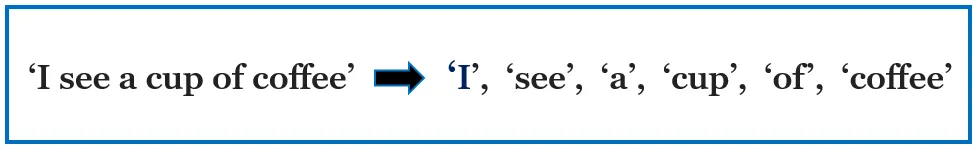

Já as **stopwords** referem-se às palavras mais comuns em qualquer idioma natural, porém que não agregam muito valor por si só.

São palavras como artigos, preposições, conjunções, verbos de ligação.

Portanto, podemos removê-las para a nos ajudar a focar nas informações mais importantes do texto e melhorar a precisão da análise. Além de reduzir o tamanho do conjunto de dados, o que reduz o tempo de treinamento dos modelos de linguagem natural.

Para fazer a tokenização, existe dois métodos um usando o `word_tokenize` e o outro, usando `ToktokTokenizer()`.

O `ToktokTokenizer()` funciona melhor com o português e outros idiomas, separando melhor palavras e pontuações.


Já o `word_tokenize()` faz parte do módulo nltk.tokenize, e é baseada em regras treinadas para a língua inglesa. Ela usa o tokenizer chamado TreebankTokenizer, que é mais sensível a aspectos gramaticais do inglês. E por isso, é esse que irei utilizar nesse notebook.  

Para a remoção das stopwords, será utilizada o dataset `stopwords.words('portuguese')`, que é uma lista de todos os stopwords da língua portuguesa.

No código abaixo, ao mesmo tempo que será feita a tokenização do texto, também será retiradas as stop words.

In [ ]:
# lista de stopwords da língua portuguesa
stopwords_en = stopwords.words('english')
print(stopwords_en[:10])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


No código acima, printei 10 das stopwords da lista de palavras.

In [ ]:
tokens_totais =[] # criando a lista de tokens

for content in df['content_en']:
  tokens = word_tokenize(content)
  # filtrando as stopwords
  tokens_filtrados = [token for token in tokens
                      if token not in stopwords_en] # adiciona na lista 'tokens filtrados' todas as palavras de tokens que não for stopword.
  tokens_totais.extend(tokens_filtrados) # Aqui é necessário um .extend, pois tokens filtrados não é um elemento de uma lista e sim, uma lista. O .extend serve para juntar várias listas de tokens

frequencia = Counter(tokens_totais)
tokens_frequencia = frequencia.items()
top_20 = frequencia.most_common(20)
print(top_20)

[('app', 53984), ('netflix', 53830), ('movies', 28469), ('watch', 27585), ('shows', 20981), ('good', 20829), ('like', 17837), ('cant', 16141), ('love', 15256), ('please', 13712), ('dont', 13068), ('great', 12093), ('even', 11911), ('im', 11658), ('phone', 11291), ('time', 10436), ('try', 10266), ('tv', 10255), ('movie', 10051), ('get', 9985)]


In [ ]:
# adicionando uma nova coluna do dataset com as palavras tokenizadas
df['tokenized_words'] = df['content_en'].apply(word_tokenize)

In [ ]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,language,content_en,tokenized_words
0,9eacdc69033d44f0ade20e089c5f1a15,biswajit murmu,it is a good entertainment app but there are t...,2,0,991 build 9 62416,20250408 134513,991 build 9 62416,en,it is a good entertainment app but there are t...,"[it, is, a, good, entertainment, app, but, the..."
1,2001035375d74477b9a1488b32f8e29c,daniel ellis,overriding my screen brightness during ads is ...,1,1,991 build 9 62416,20250408 133846,991 build 9 62416,en,overriding my screen brightness during ads is ...,"[overriding, my, screen, brightness, during, a..."
2,dd835d0deb494507a33852d088193691,sudhir gaikwad,awesome,5,0,NaN,20250408 132733,NaN,af,awesome,[awesome]
3,7cdd907b53c34289bf292c676b985eeb,hayden elders,in netflix good movie,5,0,10,20250408 131857,10,af,in netflix good movie,"[in, netflix, good, movie]"
4,ce15986f8bde48fe95d6a60c87b3cd18,fzrharm,had netflix in thailand so i could watch weste...,1,3,991 build 9 62416,20250408 130403,991 build 9 62416,en,had netflix in thailand so i could watch weste...,"[had, netflix, in, thailand, so, i, could, wat..."


### Stemming e Lematização

#### Stemming

Reduzir palavras a sua raiz - Ou seja, tira os sufixos, mas sem se preocupar com a forma correta da palavra no dicionário.

Exemplos:

- stemmer.stem('amando')     # → 'am'
- stemmer.stem('amava')      # → 'am'
- stemmer.stem('amado')      # → 'am'

In [ ]:
# Instanciando o PorterStemmer()
stemmer = PorterStemmer()


# definindo uma função para executar o stemming das palavras tokenizadas
def stem_words(tokens):
  return [stemmer.stem(token) for token in tokens]




In [ ]:
df['stemmed_words'] = df['tokenized_words'].apply(stem_words)
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,language,content_en,tokenized_words,stemmed_words
0,9eacdc69033d44f0ade20e089c5f1a15,biswajit murmu,it is a good entertainment app but there are t...,2,0,991 build 9 62416,20250408 134513,991 build 9 62416,en,it is a good entertainment app but there are t...,"[it, is, a, good, entertainment, app, but, the...","[it, is, a, good, entertain, app, but, there, ..."
1,2001035375d74477b9a1488b32f8e29c,daniel ellis,overriding my screen brightness during ads is ...,1,1,991 build 9 62416,20250408 133846,991 build 9 62416,en,overriding my screen brightness during ads is ...,"[overriding, my, screen, brightness, during, a...","[overrid, my, screen, bright, dure, ad, is, a,..."
2,dd835d0deb494507a33852d088193691,sudhir gaikwad,awesome,5,0,NaN,20250408 132733,NaN,af,awesome,[awesome],[awesom]
3,7cdd907b53c34289bf292c676b985eeb,hayden elders,in netflix good movie,5,0,10,20250408 131857,10,af,in netflix good movie,"[in, netflix, good, movie]","[in, netflix, good, movi]"
4,ce15986f8bde48fe95d6a60c87b3cd18,fzrharm,had netflix in thailand so i could watch weste...,1,3,991 build 9 62416,20250408 130403,991 build 9 62416,en,had netflix in thailand so i could watch weste...,"[had, netflix, in, thailand, so, i, could, wat...","[had, netflix, in, thailand, so, i, could, wat..."


In [ ]:
df['stemmed_words']

,stemmed_words
0,"[it, is, a, good, entertain, app, but, there, ..."
1,"[overrid, my, screen, bright, dure, ad, is, a,..."
2,[awesom]
3,"[in, netflix, good, movi]"
4,"[had, netflix, in, thailand, so, i, could, wat..."
...,...
133484,"[i, realli, like, it, there, are, so, mani, mo..."
133485,"[i, love, netflix, i, alway, enjoy, my, time, ..."
133486,"[sound, qualiti, is, veri, slow, of, movi]"
133487,"[rate, is, veri, expens, bco, we, see, netflix..."


In [ ]:
# lista para armazenar os stems
stems = []

for texto in tokens_totais:
  stem = stemmer.stem(texto)
  stems.append(stem)

#### Lematização

Transforma a palavra na sua forma canônica, também chamado de lema, ou seja, a forma que aparece no dicionário.

Exemplos:

- amando → amar
- amava  → amar
- amado  → amar

Na lematização é feita uma análise linguística profunda (morfologia e sintaxe).
O resultado é uma palavra válida no idioma e leva em conta o contexto gramatical da palavra.

O código abaixo serve para contabilizar a frequência das 20 palavras mais comuns no dataset:

In [ ]:
# Dicionário para armazenar lemas e contagem agregada:

lemmatized_counts = {}
lemmas = []

# definindo o loop que irá executar a lematização na coluna 'content' e contar a quantidade de palavras
for word, count in top_20:
  doc = nlp(word)
  lemma = doc[0].lemma_
  lemmas.append(lemma)
  lemmatized_counts[lemma] = lemmatized_counts.get(lemma, 0) + count

print(lemmatized_counts) # 20 palavras mais frequentes



{'app': 53984, 'netflix': 53830, 'movie': 28469, 'Watch': 27585, 'show': 20981, 'good': 20829, 'Like': 17837, 'cant': 16141, 'lover': 15256, 'please': 13712, 'dont': 13068, 'great': 12093, 'even': 11911, 'im': 11658, 'phone': 11291, 'Time': 10436, 'try': 10266, 'tv': 10255, 'movier': 10051, 'Get': 9985}


E abaixo é feita a lematização utilizado do

In [ ]:
# adicionando uma nova coluna no dataframe

#instanciando o wordnetlemmatizer
lemmatizer = WordNetLemmatizer()

# Definir uma função para lematizar tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

#criando uma coluna com os tokens lematizados
df['lemmatized_words'] = df['tokenized_words'].apply(lemmatize_tokens)

In [ ]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,language,content_en,tokenized_words,stemmed_words,lemmatized_words
0,9eacdc69033d44f0ade20e089c5f1a15,biswajit murmu,it is a good entertainment app but there are t...,2,0,991 build 9 62416,20250408 134513,991 build 9 62416,en,it is a good entertainment app but there are t...,"[it, is, a, good, entertainment, app, but, the...","[it, is, a, good, entertain, app, but, there, ...","[it, is, a, good, entertainment, app, but, the..."
1,2001035375d74477b9a1488b32f8e29c,daniel ellis,overriding my screen brightness during ads is ...,1,1,991 build 9 62416,20250408 133846,991 build 9 62416,en,overriding my screen brightness during ads is ...,"[overriding, my, screen, brightness, during, a...","[overrid, my, screen, bright, dure, ad, is, a,...","[overriding, my, screen, brightness, during, a..."
2,dd835d0deb494507a33852d088193691,sudhir gaikwad,awesome,5,0,NaN,20250408 132733,NaN,af,awesome,[awesome],[awesom],[awesome]
3,7cdd907b53c34289bf292c676b985eeb,hayden elders,in netflix good movie,5,0,10,20250408 131857,10,af,in netflix good movie,"[in, netflix, good, movie]","[in, netflix, good, movi]","[in, netflix, good, movie]"
4,ce15986f8bde48fe95d6a60c87b3cd18,fzrharm,had netflix in thailand so i could watch weste...,1,3,991 build 9 62416,20250408 130403,991 build 9 62416,en,had netflix in thailand so i could watch weste...,"[had, netflix, in, thailand, so, i, could, wat...","[had, netflix, in, thailand, so, i, could, wat...","[had, netflix, in, thailand, so, i, could, wat..."


**Comparativo rápido do Stemming e Lemmatizing:**

| Característica | **Stemming** | **Lematização** |
| --- | --- | --- |
| Resultado | Raiz aproximada | Palavra dicionarizada |
| Baseado em regras | Sim | Sim + modelos linguísticos |
| Contexto | Ignora | Leva em conta |
| Exatidão | Menor | Maior |
| Performance | Mais rápido | Mais lento |
| Exemplo "amando" | "am" | "amar" |

O objetivo desse notebook é fazer a mineração do dados com o propósito de transformar dados não estruturados em dados estruturados. Em breve estarei postando o processo de análise de sentimentos. Abraços!